In [45]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# 2. Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
df = pd.read_csv('/content/drive/My Drive/network_traffic_dataset.csv')

In [48]:
df.head()

,Traffic Volume (Bytes),Packets per Second (PPS),Packet Size,Flow Duration,Bandwidth Utilization
0,0.066899,0.003550,0.643678,0.000650,0.667666
1,0.066899,0.002653,0.643678,0.000869,0.499068
2,0.137404,0.003277,0.664733,0.000986,0.904060
3,0.205422,0.002743,0.722757,0.001683,0.791951
4,0.058443,0.003229,0.282737,0.001000,0.378933


In [49]:
 # Data Cleaning
print("Initial shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Initial shape: (2039764, 5)

Missing values:
 Traffic Volume (Bytes)      0
Packets per Second (PPS)    0
Packet Size                 0
Flow Duration               0
Bandwidth Utilization       0
dtype: int64


In [51]:
# # Handle missing data
# df.dropna(subset=['target_column'], inplace=True)  # Critical target values
# df.fillna({'numeric_column': df['numeric_column'].median(),
#            'categorical_column': 'Unknown'}, inplace=True)

In [52]:
# Check for duplicates
duplicates = df[df.duplicated()]
print("\nNumber of duplicate rows:", len(duplicates))
print("\nDuplicate Rows:")
duplicates




Number of duplicate rows: 318247

Duplicate Rows:


,Traffic Volume (Bytes),Packets per Second (PPS),Packet Size,Flow Duration,Bandwidth Utilization
656,0.000000,0.010606,0.000000,8.619175e-05,0.000000
746,0.000746,0.084712,0.014438,9.983343e-06,0.444089
973,0.000746,0.185432,0.014438,4.058337e-06,0.972052
1417,0.000000,0.011512,0.000000,7.934174e-05,0.000000
1448,0.000000,0.846480,0.000000,1.666668e-07,0.000000
...,...,...,...,...,...
2039700,0.000000,0.449549,0.000000,2.158335e-06,0.000000
2039720,0.000000,0.673414,0.000000,1.133334e-06,0.000000
2039747,0.000000,0.134085,0.000000,5.966672e-06,0.000000
2039749,0.000000,0.357705,0.000000,1.658335e-06,0.000000


In [53]:
# Remove duplicates

df.drop_duplicates(inplace=True)
print("\nShape after removing duplicates:", df.shape)



Shape after removing duplicates: (1721517, 5)


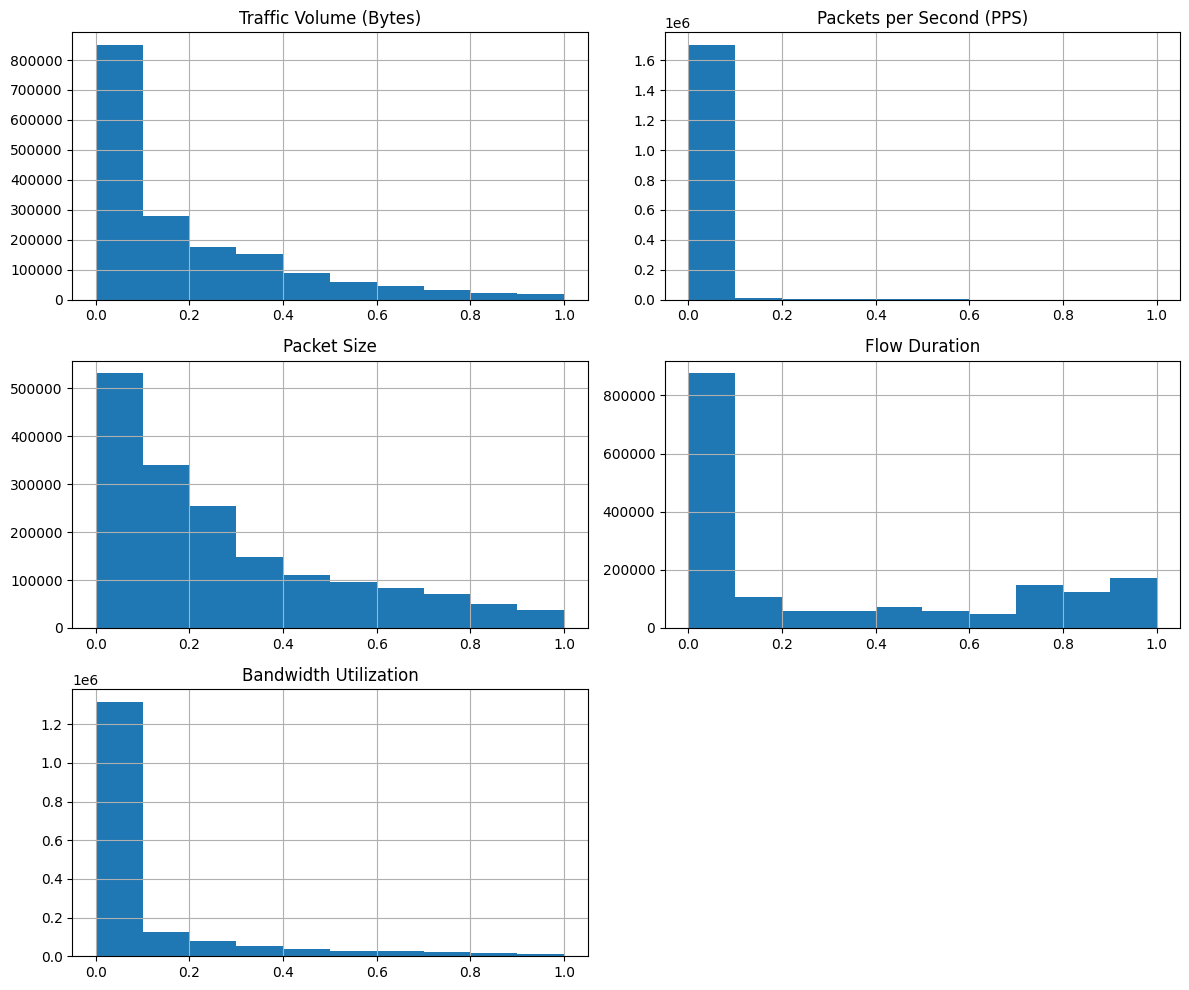

In [54]:
# Exploratory Data Analysis
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()


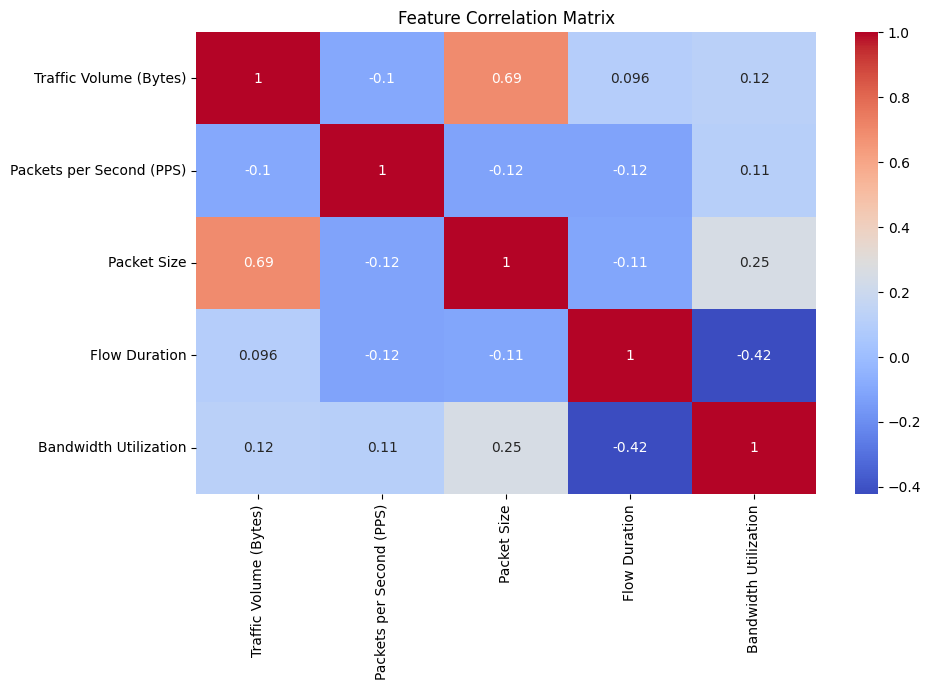

In [55]:
#Plotting the Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

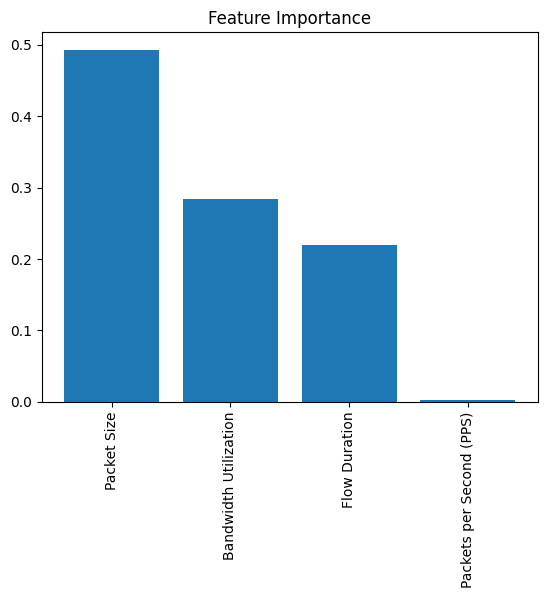

In [56]:
# Feature Importance plot

importances = dt_pipeline.named_steps['regressor'].feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()


In [57]:
#Data Preprocessing

# Define features and target
X = df.drop('Traffic Volume (Bytes)', axis=1)
y = df['Traffic Volume (Bytes)']

In [58]:
# Column transformations
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [59]:
# LinearRegression model

from sklearn.linear_model import LinearRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and evaluate the Linear Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Packets per Second (PPS)', 'Packet Size', 'Flow Duration',
       'Bandwidth Utilization'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', LinearRegression())])

In [60]:
# Model Evaluation
y_pred = pipeline.predict(X_test)

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [62]:
print("Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Linear Regression:
Mean Squared Error: 0.022802771944811315
Root Mean Squared Error: 0.15100586725293597
R-squared: 0.511443286748706


In [63]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create and evaluate the Decision Tree Regression model
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
dt_y_pred = dt_pipeline.predict(X_test)




In [64]:

# Evaluate the Decision Tree Regression model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)

In [65]:

print("Decision Tree Regression:")
print(f"Mean Squared Error: {dt_mse}")
print(f"Root Mean Squared Error: {dt_rmse}")
print(f"R-squared: {dt_r2}")

Decision Tree Regression:
Mean Squared Error: 1.3624912468659642e-05
Root Mean Squared Error: 0.0036911939082984574
R-squared: 0.9997080818739873
